# 이미지 처리 기초
https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/

## 색공간
- 이이미지를 구성하는 하나의 픽셀 정보를 다차원 수치공간으로  표현하는 방식
    - 그레이스케일(gray scale)
        - 가장 간단한 색공간으로 각 픽셀은 보통 0~255사이의 정수로 표현
        - 0은 검은색이고 숫자가 커질 수록 밝아짐
        - 이미지 데이터는 2차원 배열로 표현됨
            - 이미지 세로길이 픽셀수
            - 이미지 가로길이 픽셀수
    - RGB(Red, Green, Blue)
        - 적, 녹, 청 3가지 색의 조합으로 이루어짐
        - (0,0,0)은 검은색
        - 이미지 데이터는 3차원 배열로 표현
            - 이미지 세로길이 픽셀수
            - 이미지 가로길이 픽셀수
            - 채널(각각의 색 성분의 밝기를 나타냄)
    - HSV(Hue, Saturation, Value)
        - 각 픽셀은 HSV 색공간 모형 좌표계의 좌표를 가짐
            - 색상(Hue) : 색상값 H는 가시광선 스펙트럼을 고리모양으로 배치한 색상환에서 상대적인 배치각도 의미
                - 0도와 360도는 같은 빨강
            - 채도(Saturation) : 0~100% 진함정도
            - 명도(Value) : 0~100% 밝음 정도
    

### gray scale image

In [2]:
import scipy as sp
import scipy.misc
import matplotlib.pyplot as plt

(768, 1024)


array([[143, 143, 143, 143, 143],
       [144, 144, 144, 144, 143],
       [145, 145, 144, 143, 143],
       [144, 144, 143, 142, 142],
       [143, 143, 142, 141, 140]], dtype=uint8)

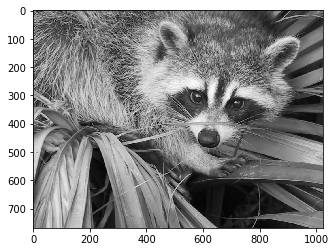

In [7]:
img_gray = sp.misc.face(gray=True)
print(img_gray.shape)
display(img_gray[-5:, -5:])
plt.imshow(img_gray, cmap=plt.cm.gray)

### RGB image

In [16]:
img_rgb = sp.misc.face()
print(img_rgb.shape)
display(img_rgb[-4:, -4:, 0]) # red
display(img_rgb[-4:, -4:, 1]) # green
display(img_rgb[-4:, -4:, 2]) # blue


(768, 1024, 3)


array([[120, 120, 120, 119],
       [121, 120, 119, 119],
       [122, 121, 120, 120],
       [121, 120, 119, 118]], dtype=uint8)

array([[158, 158, 158, 157],
       [159, 158, 157, 158],
       [157, 157, 156, 156],
       [156, 156, 155, 154]], dtype=uint8)

array([[ 99,  99,  97,  96],
       [100,  97,  96,  95],
       [ 99,  96,  94,  94],
       [ 98,  95,  93,  92]], dtype=uint8)

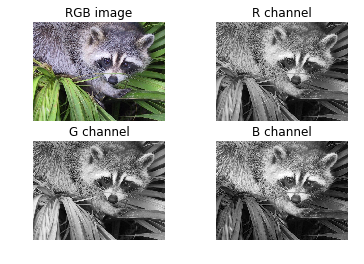

In [15]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)
plt.axis("off")
plt.title("RGB image")
plt.subplot(222)
plt.imshow(img_rgb[:,:,0], cmap=plt.cm.gray)
plt.axis("off")
plt.title("R channel")
plt.subplot(223)
plt.imshow(img_rgb[:,:,1], cmap=plt.cm.gray)
plt.axis("off")
plt.title("G channel")
plt.subplot(224)
plt.imshow(img_rgb[:,:,2], cmap=plt.cm.gray)
plt.axis("off")
plt.title("B channel")

plt.show()

### HSV image

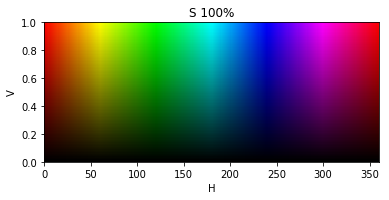

In [20]:
from matplotlib.colors import hsv_to_rgb
import numpy as np

V, H = np.mgrid[0:1:100j, 0:1:300j]
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent = [0, 360, 0, 1], aspect = 150)
plt.xlabel("H")
plt.ylabel("V")
plt.title("S 100%")
plt.grid(False)
plt.show()

#### RGB와 HSV 상호변환
- rgb_to_hsv
- hsv_to_rgb

In [27]:
import matplotlib as mpl

img_hsv = mpl.colors.rgb_to_hsv(img_rgb)
print(img_hsv.shape)

display(img_hsv[:3, :3, 0]) # H 색상
display(img_hsv[:3, :3, 1]) # S 채도
display(img_hsv[:3, :3, 2]) # V 명도

(768, 1024, 3)


array([[0.74561405, 0.74561405, 0.7380952 ],
       [0.7314815 , 0.7314815 , 0.73015875],
       [0.7314815 , 0.7314815 , 0.7314815 ]], dtype=float32)

array([[0.14503817, 0.12837838, 0.12727273],
       [0.18      , 0.14876033, 0.14685315],
       [0.21428572, 0.17142858, 0.14285715]], dtype=float32)

array([[131., 148., 165.],
       [100., 121., 143.],
       [ 84., 105., 126.]], dtype=float32)

## 압축형식
- bmp
    - 압축하지 않은 원본 그대로의 화질 유지
    - RLE 압축방식을 사용하여 파일을 압출할 수 있음
    - 용량이 크고 웹브라우저마다 제한이 있음
    - 레이어와 알파채널을 지원하지 않음
- jpg, jpeg
    - RGB모드와 CMYK모드 둘 다 지원
    - 모든 컬러 정보를 유지
    - 손실압축방식을 통해 조정 가능
    - 투명 이미지를 지원하지 않음
    - 압축율을 높일 수록 퀄리티가 낮아짐
    - 레이어와 알파채널을 지원하지 않음
- gif
    - 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 군현할 수 있음
    - 투명 이미지를 지원
    - 1.8비트 256컬러로 제한
- png
    - 비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여줌
    - 이미지의 모든 컬러정보와 알파 채널을 보존

## Pillow를 이용한 이미지 처리
- PIL(Pyhton Imageing Library)
- 다양한 포맷을 지원

In [32]:
from PIL import Image

img_logo_png = Image.open('./logo.png')
img_logo_png.size

(601, 203)

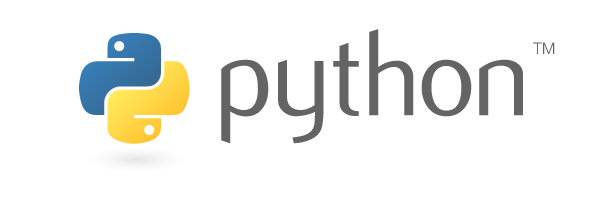

In [34]:
display(img_logo_png)

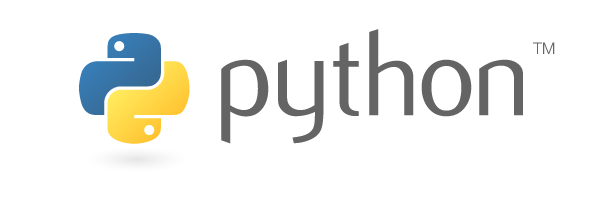

In [35]:
img_logo_png.save('./logo.bmp')
img_logo_bmp = Image.open('./logo.bmp')
display(img_logo_bmp)

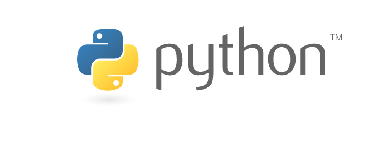

In [36]:
# image => np.array
img_logo_array = np.array(img_logo_bmp)
plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

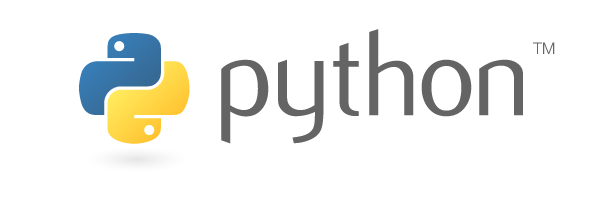

In [39]:
# np.array => image
display(Image.fromarray(img_logo_array))

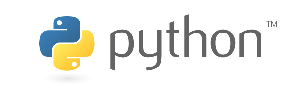

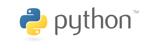

In [41]:
# resize
img_logo_png2 = img_logo_png.resize((300,100))
display(img_logo_png2)

# thumbnail
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150,50))
display(img_logo_thumbnail)

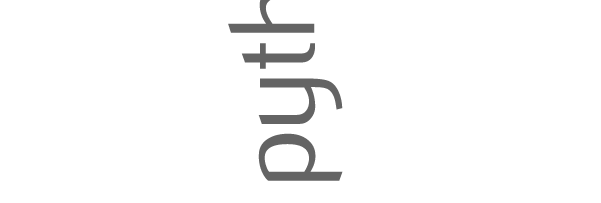

In [42]:
# rotate
img_logo_rotated = img_logo_png.rotate(90)
display(img_logo_rotated)

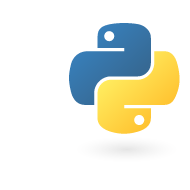

In [44]:
# crop
# 관심있는 특정 부분(ROI: region of interest)
# 좌-상의 좌표, 우-하의 좌표
img_logo_cropped = img_logo_png.crop((10,10,200,200))
display(img_logo_cropped)

## OpenCV
- Open Source Computer Vision
- 이미지 처리, 컴퓨터 비전을 위한 라이브러리

In [47]:
import cv2

img_astro3 = cv2.imread('./astronaut.png')
img_astro3.shape

(525, 700, 3)

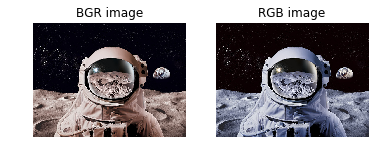

In [49]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 merge
img_astro3_rgb = cv2.merge([r, g, b])

plt.subplot(121)
plt.imshow(img_astro3, cmap=plt.cm.gray)
plt.title("BGR image")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_rgb, cmap=plt.cm.gray)
plt.title("RGB image")
plt.axis("off")

plt.show()

(-0.5, 699.5, 524.5, -0.5)

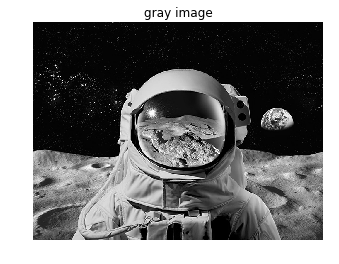

In [51]:
# 색공간 변환
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("gray image")
plt.axis("off")

In [52]:
# 이미지 저장
cv2.imwrite('./gray_astronaut.png', img_astro3_gray)

True

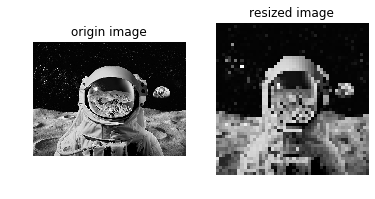

In [56]:
# 이미지 크기 변환
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize = (50,50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("origin image")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("resized image")
plt.axis('off')
plt.show()

# 이미지 변환
https://datascienceschool.net/view-notebook/70820c6bcf154b8cb8161b4f93e4880d/
## 동차좌표와 어파인 변환
- 동차좌표(Homogenous Coordinate) : 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현
- 3 x 3 행렬로 3차원 좌표의 변환을 할 때, 이 행렬을 사영행렬(homography matrix)이라고 부름

## 강체변환(rigid transform)
- 유클리드 변환이라고도 불림
- 회전, 이동 두가지 요소만 사용하여 이미지를 변환

## 유사변환(similarity transform)
- 확대/축소, 회전, 이동 세가지 요소를 사용하여 이미지 변환

## 변환행렬
- homography matrix로 보면 됨
- getRotationMatirx2D(center, angle, scale) 통해 만듬
    - center : 이미지 중심좌표
    - angle : 시계반대방향 회전 각도
    - scale : 변환하려는 크기 비율

In [72]:
import cv2

img_astro = cv2.imread('./astronaut.png')
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

# 90도 회전 크기는 절반
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)
# 100만큼 평행이동
H[:, 2] += 100
display(H)

array([[ 3.061617e-17,  5.000000e-01,  3.187500e+02],
       [-5.000000e-01,  3.061617e-17,  5.375000e+02]])

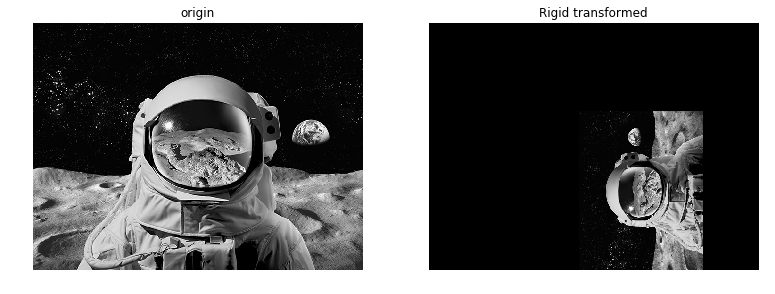

In [75]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (13,13))
ax1.set_title('origin')
ax1.axis('off')
ax1.imshow(img, cmap = plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

### 3점 어파인 변환
- 어파인 변환에 사용되는 행렬을 지정하는데는 3점이 어떻게 변환되는지만 알면 됨
- getAffineMatrix 함수 통해 사영행렬 계산

array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

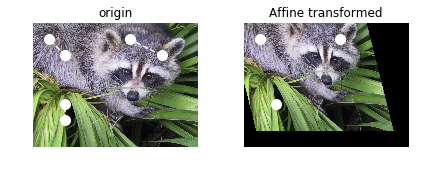

In [83]:
img = sp.misc.face()
rows, cols, ch = img.shape

pts1 = np.float32([[200,200], [200,600], [800,200]])
pts2 = np.float32([[100,100], [200,500], [600,100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H = cv2.getAffineTransform(pts1, pts2)
display(H)

img2 = cv2.warpAffine(img, H, (cols, rows))
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.set_title("origin")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s = 100)
ax1.scatter(pts_x2, pts_y2, c='w', s = 100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()


### 원근법 변환(perspective transform)
- 핀홀 카메라 모형을 사용하여 2차원 이미지를 변환
- 직선은 성질만 유지되고 선의 평행성은 유지되지 않음
- 원근법 변환을 지정하는데는 4점이 필요

In [84]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

# 사영행렬 계산
H = cv2.getPerspectiveTransform(pts1, pts2)
display(H)

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

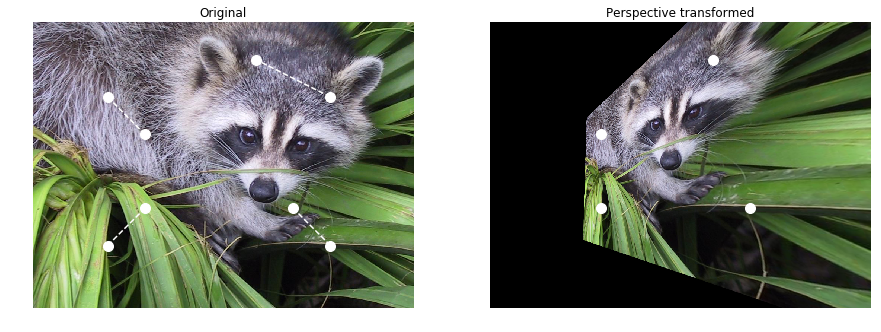

In [87]:
img2 = cv2.warpPerspective(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (15,15))

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100)
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

# 이미지 필터
https://datascienceschool.net/view-notebook/c4121d311aa34e6faa84f62ef06e43b0/

## 임계처리(thresholding)
- 사용자가 지정한 기준값을 기준으로 이미지 픽셀의 값이 더 크면 최대값, 더 작으면 최소값을 적용하여 이진화 함
- cv2,threshold(src, thresh, maxval, type)
    - src : 그레이 스케일 이미지
    - thresh : 기준 값
    - maxval : 기준값을 넘었을 때 적용할 값
    - type : 임계처리 유형
        - 5가지 구현되어 있음


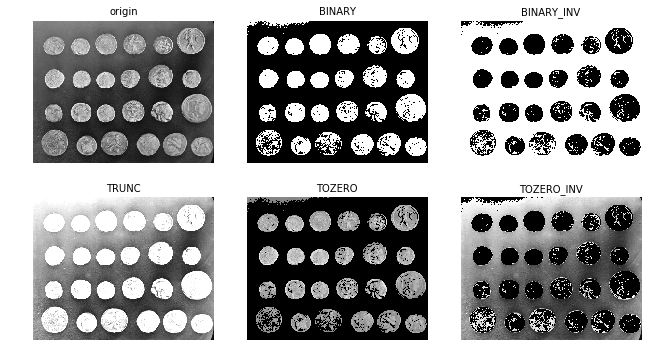

In [91]:
import cv2
from skimage.data import coins

img = coins()

_, thresh1 = cv2.threshold(img, 255/2, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 255/2, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 255/2, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 255/2, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 255/2, 255, cv2.THRESH_TOZERO_INV)

titles = ['origin', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

## 적응임계처리
- 임계처리의 경우는 기준값이 하나이기 때문에, 기준값을 설정하는데 고민을 해야하고 한 이미지 내에서 음영, 명도의 차이가 있을 때는 한 부분 전체가 흰색 혹은 검은색으로 보이는 단점이 있음
- 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 기준값을 계산하고 그에 따라 임계처리를 함
- cv2.adaptiveThreshold()
    - src : 그레이스케일 이미지
    - maxValue : 기준값을 넘었을 때 적용할 값
    - adaptiveMethod : 영역 내에서 기준값을 계산하는 방법
        - ADAPTIVE_THRESH_MEAN_C : 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
        - ADAPTIVE_THRESH_GAUSSIAN_C : 영역의 크기와 같은 가중치 행렬 곱하여 가중합 한 것에서 C를 뺀 값을 기준값으로 사용
    - thresholdType : 임계처리 유형
        - THRESH_BINARY와 THRESH_BINARY_INV만 가능
    - blockSize : 임계처리를 적용할 영역의 크기
    - C : 평균이나 가중평균에서 차감할 값

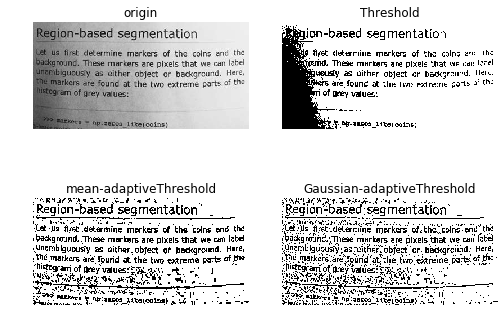

In [93]:
from skimage.data import page

img = page()
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 15, 2)
titles = ['origin', 'Threshold', 'mean-adaptiveThreshold', 'Gaussian-adaptiveThreshold']

images = [img, th1, th2, th3]
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

## 이미지 필터링
- filter 또는 kerenl 또는 window라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산

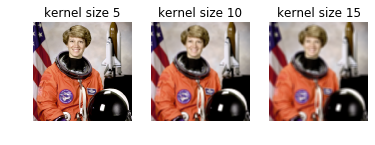

In [96]:
from skimage.data import astronaut

img = astronaut()

for k in range(5, 16, 5):
    kernel = np.ones((k,k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, k/5)
    plt.imshow(filtering)
    plt.title("kernel size {}".format(k))
    plt.axis('off')
plt.show()

## 블러
- 이미지의 노이즈를 제거하거나, 이미지 내의 경계선을 흐리게 처리 함

### Averaging
- 픽셀별로 마스크 행렬 영역 내의 평균을 구하고 이 값으로 해당 픽셀을 대체
- cv2.blur()와 cv2.boxfilter() 함수로 구현되어 있음

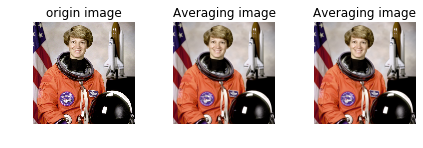

In [99]:
from skimage.data import astronaut

img = astronaut()
blur = cv2.blur(img, (5,5))
boxfilter = cv2.boxFilter(img, -1, (5,5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("origin image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blur)
plt.title("Averaging image")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(boxfilter)
plt.title("Averaging image")
plt.axis('off')

plt.tight_layout()
plt.show()

### 가우시안 필터링
- Averaging은 동일한 값으로 구성된 커널을 사용하지만, 가우시안 필터링은 커널 행렬의 값들을 가우시안 함수를 사용하여 생성
- 이 커널 함수를 통해 커널 영역 내의 픽셀값을 가중평균한 값으로 해당 픽셀을 대체
- 현재 픽셀에서 가까울수록 더 큰 가중치를 갖고 멀수록 더 작은 가중치를 갖게 됨
- 가우시안 노이즈를 제거하는데 도움이 됨
- 커널의 크기는 홀수만 가능

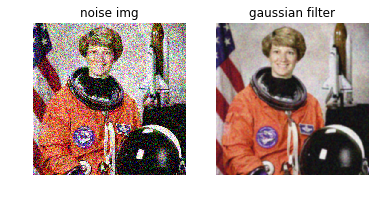

In [100]:
img_noise = np.clip((img/255 + np.random.normal(scale=0.2, size=img.shape)) * 255, 0, 255).astype('uint8')
dst = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("noise img")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dst)
plt.title("gaussian filter")
plt.axis('off')
plt.show()

### 양방향 필터링(Bilateral Filtering)
- 가우시안 필터링을 쓰면, 이미지의 경계선까지 흐려지게 됨
- 가우시안 필터링과 마찬가지로 가우시안 함수로 생성한 커널을 사용하여 커널 영역 내의 값을 가중 평균하지만 픽셀과의 거리 뿐만 아니라 픽셀값의 차이도 같이 사용
- cv2.bilateralFilter()
    - 이미지와 커널 크기
    - 색의 차이에 대한 표준편차
    - 픽셀간의 거리에 대한 표준편차 입력

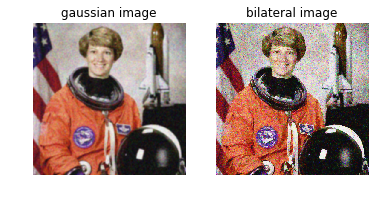

In [101]:
dst1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
dst2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.subplot(1, 2, 1)
plt.imshow(dst1)
plt.title("gaussian image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dst2)
plt.title("bilateral image")
plt.axis('off')
plt.show()

### 형태변환(morphological transformation)
- 단순화, 제거, 보정을 통해서 형태를 파악하는 목적으로 사용 됨
- 침식(Erosion). 팽창(Dilation), 그리고 이 두가지를 조합한 Opening과 Closing이 있음
- 이 알고리즘들은 변화에 사용할 커널의 모양 정보를 가진 Structuring element를 인수로 받음
    - cv2.getStructuringElement()함수 통해 Structuring element를 사용할 수 있음
        - 사각형, 십자가, 원, 타원 등의 모양

#### 침식(Erosion)
- 각 픽셀에 커널을 적용하여 커널 영역내의 최솟값으로 해당 픽셀을 대체
- cv2.erode()
    - 변환할 이미지와 커널, 반복횟수를 입력
- cv2.getStructuringElement()함수로 커널 생성
    - v2.MORPH_RECT	사각형 모양
    - cv2.MORPH_ELLIPSE	타원형 모양
    - cv2.TMORPH_CROSS 십자 모양

In [105]:
kernel[0].shape

(13, 13)

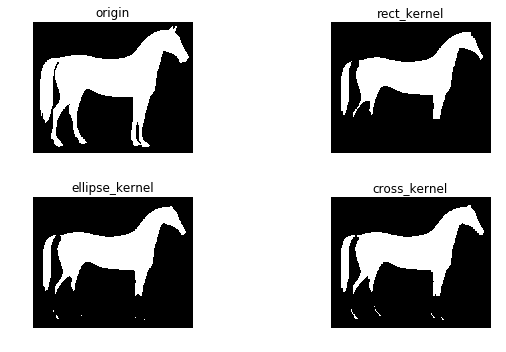

In [6]:
from skimage.data import horse
img = horse().astype('uint8')
img = np.ones(img.shape) - img
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, (13, 13))
title = ["rect_kernel", "ellipse_kernel", "cross_kernel"]
plt.figure(figsize=(9,5))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("origin")
plt.axis('off')

for i in range(3):
    erosion = cv2.erode(img, kernel[i], iterations=1)
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='gray')
    plt.title(title[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 팽창(Dilation)
- 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체
- cv2.dilate()

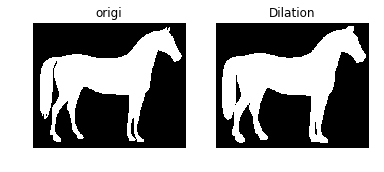

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("origi")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap="gray")
plt.title("Dilation")
plt.axis('off')
plt.show()

#### opening과 closing
- Erosion과 Dilation을 조합한 것
- 어느 것을 먼저 적용하는 가에 따라 구분됨
- Opening은 Erosion을 적용한 뒤 Dilation을 적용
    - 점잡음, 작은 물체, 돌기 등을 제거하는데 적합
- Closing은 반대로 Dilation을 적용한 뒤 Erosion을 적용
    - 전체적인 윤곽을 파악하는데 적합

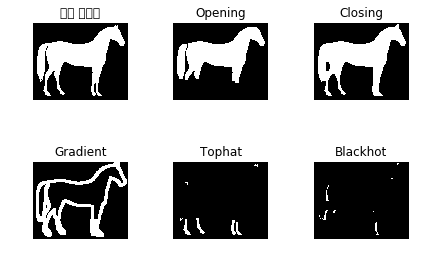

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,13))
#cv2.MORPH_OPEN -> cv.dilate(cv2.erode(image))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#cv2.MORPH_CLOSE -> cv.erode(cv2.dilate(image))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# cv2.MORPH_GRADIENT -> cv2.dilate(image) - cv2.erode(image)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# cv2.MORPH_TOPHAT -> image - opening(image)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# cv2.MORPH_BLACKHAT -> image - closing(image)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

images = [img, opening, closing, gradient, tophat, blackhat]
titles = ["origin", 'Opening', 'Closing', 'Gradient', 'Tophat', 'Blackhot']

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# 이미지 컨투어
https://datascienceschool.net/view-notebook/f9f8983941254a34bf0fee42c66c5539/#%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%BB%A8%ED%88%AC%EC%96%B4
- 동일한 색 또는 동일한 픽셀값(강도, intensity)을 가지고 있는 영역의 경계선을 연결한 선을 말함
- 컨투어는 물체의 윤곽선, 외형을 파악하는데 사용 됨
    - cv2.findContours()를 통해 찾음
- 결과물의 정확성을 위하여 임계처리 등을 통해 이미지를 이진화하여 사용함
    - cv2.findCounters() : 이미지와 컨투어 정보, 컨투어의 상하구조 정보를 출력 함
        - image : 그레이스케일 이미지 혹은 이진화한 이미지
        - mode : 컨투어를 찾는 방법
        - method : 컨투어를 찾을 때 사용하는 근사치 방법
    - cv2.drawCountours() : 컨투어 정보를 인자로 주어 이미지의 컨투어를 시각화 함

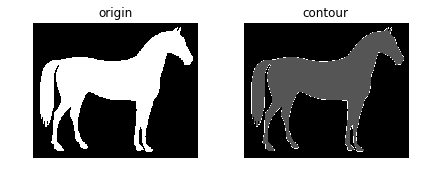

In [13]:
import cv2
from skimage.data import page, horse
import numpy as np
import matplotlib.pyplot as plt

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw
img = img_raw.copy().astype('uint8')
# 모든 컨투어 라인을 찾고, 모든 상하구조를 구성
contours, hierachy = cv2.findContours(img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img, contours, -1, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='gray')
plt.title("origin")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title("contour")
plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# contours point
print(contours[0].shape)
contours[0][:5]
print(contours[1].shape)
contours[1][:5]

(801, 1, 2)
(6, 1, 2)


array([[[ 34, 239]],

       [[ 35, 238]],

       [[ 36, 239]],

       [[ 36, 244]],

       [[ 35, 245]]], dtype=int32)

## 컨투어 특징

### 이미지 모멘트
- 이미지의 컨투어에 관한 정보
- 대상을 구분할 수 있는 특징값을 뜻 함
    - Area(면적), 둘레 등이 있음
- cv2.moments()
    - 컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환
        - 총 24개
            - 10개의 위치 모멘트
            - 7개의 중심 모멘트
            - 7개의 정규화된 중심 모멘트

In [25]:
import cv2
from skimage.data import horse

cnt = contours[0]
M = cv2.moments(cnt)

print(M.items())

dict_items([('m00', 42390.0), ('m10', 7957647.5), ('m01', 6122659.166666666), ('m20', 1918567975.1666665), ('m11', 1045850406.25), ('m02', 1043207731.5), ('m30', 518349606804.75), ('m21', 234532504815.23334), ('m12', 169961654938.16666), ('m03', 201193042374.45), ('mu20', 424721461.02993035), ('mu11', -103523583.15733838), ('mu02', 158872858.38918722), ('mu30', -1274243072.28302), ('mu21', -3710699587.248932), ('mu12', 4031007007.4581795), ('mu03', 4621820258.191528), ('nu20', 0.23636184598563853), ('nu11', -0.05761193502861847), ('nu02', 0.08841437396363862), ('nu30', -0.0034442426452973808), ('nu21', -0.01002991504548003), ('nu12', 0.010895696857668564), ('nu03', 0.012492648206940333)])


#### 컨투어의 면적 (ContourArea)
- 컨투어의 면적은 모멘트의 m00값
- cv2.contourArea()로도 구할 수 있음

In [26]:
print(cv2.contourArea(cnt), M['m00'])

42390.0 42390.0


#### 컨투어의 둘레(arc Length)
- 컨투어의 둘레는 arcLength()함수로 구할 수  있음
- 두 번째 파라미터인 closed는 폐곡선의 여부
    - True면 컨투어의 시작점과 끝점을 이어 도형을 구성
    - False면 시작점과 끝점을 잇지않고 둘레 계산

In [27]:
print(cv2.arcLength(cnt, closed = True))
print(cv2.arcLength(cnt, closed = False))

2296.72913479805
2292.72913479805


### Contour Property

#### Aspect Ratio
- 컨투어 라인의 가로 세로 비율
- cv2.boundingRect

In [30]:
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(x, y, w, h)
print("Aspect Ratio : {}".format(aspect_ratio))

18 9 371 304
Aspect Ratio : 1.2203947368421053


#### Extend
- 컨투어 라인을 포함하는 사각형의 면적에서 컨투어 면적의 비율
- cv2.contourArea()

In [32]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w*h
extend = float(area) / rect_area

print("Extend : {}".format(extend))

Extend : 0.37585118456518657


### Solidity
- Solidity Ratio는 Convex hull 면적 대비 Contour의 면적 비율

In [33]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area) / hull_area
print("Solidity : {}".format(solidity))

Solidity : 0.5091066313570772


#### 컨투어의 중심값

In [34]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print(cx, cy)

187 144


#### Extream Points
- 컨투어 라인의 좌우상하의 끝점

In [36]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

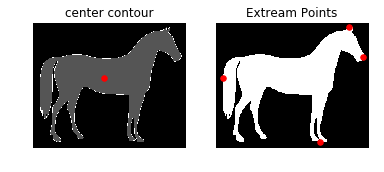

In [37]:
plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('center contour')
plt.axis('off')
plt.scatter([cx], [cy], c = 'r', s = 30)
plt.subplot(1,2,2)
plt.imshow(img_raw, cmap = 'gray')
plt.title('Extream Points')
plt.axis('off')
plt.scatter([leftmost[0], rightmost[0], topmost[0], bottommost[0]], [
            leftmost[1], rightmost[1], topmost[1], bottommost[1]], c="r", s=30)
plt.show()

### 컨투어 추정
- 컨투어 추정은 Douglas-Peucker 알고리즘을 이용해 컨투어 포인트의 수를 줄여 실제 컨투어 라인과 근사한 라인을 그릴 때 사용
- cv2.approxPolyDP()
    - 입력값으로는 컨투어 포인트 배열
    - 실제 컨투어 라인과 근사치의 최대거리
    - 폐곡선 여부

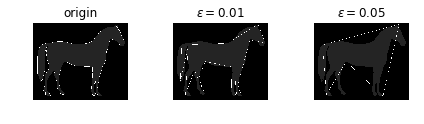

In [40]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

cnt = contours[0]

epsilon1 = 0.01*cv2.arcLength(cnt, True)
epsilon2 = 0.05*cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

image1 = cv2.drawContours(img1, [cnt], -1, 7)
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)

title = ['origin', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(title[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Convex Hull
- 컨투어 포인트를 모두 포함하는 볼록한 외곽선을 의미
- 결과는 컨투어 추정과 비슷하지만 방법이 다름
- cv2.isContourConvex()통해 이미지의 컨투어가 볼록한지 확인할 수 있음
    - 컨투어 배열이 볼록하면 True, 아니면 False
- cv2.convexHull()함수를 사용해 컨투어 라인을 볼록하게 만들 수 있음

In [42]:
cv2.isContourConvex(cnt)

False

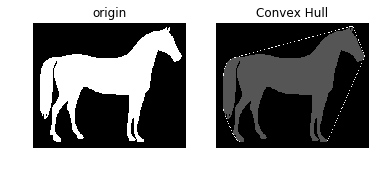

In [45]:
img4 = img_raw.copy().astype('uint8')

cnt = contours[0]
hull = cv2.convexHull(cnt)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['origin', 'Convex Hull']
images = [img_raw, img4]

for i in range(2):
    plt.subplot(1,2,(i+1))
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
    plt.axis('off')
    
plt.show()
    

### Bounding Rectangle
- 컨투어 라인을 둘러싸는 사각형으 그리는 방법
    - Straight Bounding Rectnagle : 물체의 회전 고려안한 사각혐
    - Rotated Rectangle : 물체의 회전을 고려한 사각혐

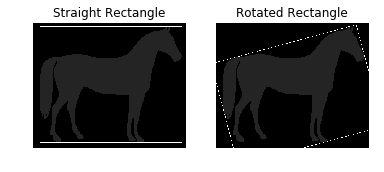

In [46]:
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')

# Straight Rectangle
x, y, w, h = cv2.boundingRect(cnt)
img1 = cv2.rectangle(img1, (x,y), (x+w, y+h), 7)

# Rotated Rectangle
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = box.astype('int')
img2 = cv2.drawContours(img2, [box], -1, 7)

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.title("Straight Rectangle")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.title("Rotated Rectangle")
plt.show()

### Minimum Enclosing Circle 과 Fitting Ellipse
- 각각 컨투어 라인을 완전히 포함하는 가장 작은 원, 타원

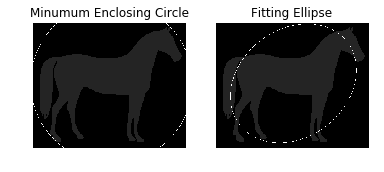

In [47]:
img3 = img_raw.copy().astype("uint8")
img4 = img_raw.copy().astype("uint8")

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(cnt)
img4 = cv2.ellipse(img4, ellipse, 7)


plt.subplot(1,2,1)
plt.imshow(img3, cmap="gray")
plt.axis('off')
plt.title("Minumum Enclosing Circle")
plt.subplot(1,2,2)
plt.imshow(img4, cmap="gray")
plt.axis('off')
plt.title("Fitting Ellipse")
plt.show()

## 이미지 특징 추출
https://datascienceschool.net/view-notebook/7eb4b2a440824bb0a8c2c7ce3da7a4e2/